In [24]:
# multivariate output multi-step 1d cnn example
import pandas as pd
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np
from keras.layers import Dropout

In [25]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [56]:
dataset = pd.read_csv('bor2hci.csv', header=0, index_col=0)
#dataset=dataset.del((:,0))
dataset=dataset.fillna(0)
#dataset = dataset.drop((c for c in dataset.columns[-6:]), axis=1)
values = dataset.values
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)
# choose a number of time steps
n_steps_in, n_steps_out = 12, 3
# convert into input/output
X_train, y_train = split_sequences(scaled[:-12,:], n_steps_in, n_steps_out)
# flatten output
n_output = y_train.shape[1] * y_train.shape[2]
y_train = y_train.reshape((y_train.shape[0], n_output))
# the dataset knows the number of features, e.g. 2
n_features = X_train.shape[2]
test = scaled[-39:,:]
X_test, y_test = split_sequences(test, n_steps_in, n_steps_out)
#X_test=scaled[-15:-3,:]
#y_test=scaled[-3:,:]
#X_test = X_test.reshape((1, n_steps_in, n_features))
#y_test = y_test.reshape((1, n_steps_out, n_features))
#y_test = y_test.reshape((y_test.shape[0], n_output))
#X_test=scaled[-15:-3,:]
#y_test=scaled[-3:,:]
X_train = X_train.reshape((X_train.shape[0],1,n_steps_in,n_features))
X_test = X_test.reshape((25,1,n_steps_in,n_features))
y_test = y_test.reshape((25, n_steps_out, n_features))
y_test = y_test.reshape((y_test.shape[0], n_output))

In [57]:
#print(X_train.shape)
#print(X_test.shape)

Train on 249 samples, validate on 25 samples
Epoch 1/500
 - 2s - loss: 0.3350 - val_loss: 0.2180
Epoch 2/500
 - 0s - loss: 0.2632 - val_loss: 0.2047
Epoch 3/500
 - 0s - loss: 0.2531 - val_loss: 0.2080
Epoch 4/500
 - 0s - loss: 0.2486 - val_loss: 0.2118
Epoch 5/500
 - 0s - loss: 0.2457 - val_loss: 0.2149
Epoch 6/500
 - 0s - loss: 0.2437 - val_loss: 0.2174
Epoch 7/500
 - 0s - loss: 0.2422 - val_loss: 0.2195
Epoch 8/500
 - 0s - loss: 0.2410 - val_loss: 0.2207
Epoch 9/500
 - 0s - loss: 0.2402 - val_loss: 0.2215
Epoch 10/500
 - 0s - loss: 0.2395 - val_loss: 0.2217
Epoch 11/500
 - 0s - loss: 0.2388 - val_loss: 0.2217
Epoch 12/500
 - 0s - loss: 0.2382 - val_loss: 0.2219
Epoch 13/500
 - 0s - loss: 0.2377 - val_loss: 0.2223
Epoch 14/500
 - 0s - loss: 0.2374 - val_loss: 0.2224
Epoch 15/500
 - 0s - loss: 0.2369 - val_loss: 0.2223
Epoch 16/500
 - 0s - loss: 0.2368 - val_loss: 0.2226
Epoch 17/500
 - 0s - loss: 0.2369 - val_loss: 0.2226
Epoch 18/500
 - 0s - loss: 0.2370 - val_loss: 0.2230
Epoch 19/5

Epoch 154/500
 - 0s - loss: 0.2328 - val_loss: 0.2194
Epoch 155/500
 - 0s - loss: 0.2328 - val_loss: 0.2194
Epoch 156/500
 - 0s - loss: 0.2328 - val_loss: 0.2194
Epoch 157/500
 - 0s - loss: 0.2328 - val_loss: 0.2193
Epoch 158/500
 - 0s - loss: 0.2328 - val_loss: 0.2193
Epoch 159/500
 - 0s - loss: 0.2328 - val_loss: 0.2193
Epoch 160/500
 - 0s - loss: 0.2327 - val_loss: 0.2193
Epoch 161/500
 - 0s - loss: 0.2327 - val_loss: 0.2192
Epoch 162/500
 - 0s - loss: 0.2327 - val_loss: 0.2192
Epoch 163/500
 - 0s - loss: 0.2327 - val_loss: 0.2192
Epoch 164/500
 - 0s - loss: 0.2327 - val_loss: 0.2192
Epoch 165/500
 - 0s - loss: 0.2327 - val_loss: 0.2191
Epoch 166/500
 - 0s - loss: 0.2327 - val_loss: 0.2191
Epoch 167/500
 - 0s - loss: 0.2327 - val_loss: 0.2191
Epoch 168/500
 - 0s - loss: 0.2327 - val_loss: 0.2191
Epoch 169/500
 - 0s - loss: 0.2327 - val_loss: 0.2190
Epoch 170/500
 - 0s - loss: 0.2326 - val_loss: 0.2190
Epoch 171/500
 - 0s - loss: 0.2326 - val_loss: 0.2190
Epoch 172/500
 - 0s - loss: 

Epoch 306/500
 - 0s - loss: 0.2313 - val_loss: 0.2164
Epoch 307/500
 - 0s - loss: 0.2313 - val_loss: 0.2164
Epoch 308/500
 - 0s - loss: 0.2313 - val_loss: 0.2164
Epoch 309/500
 - 0s - loss: 0.2313 - val_loss: 0.2164
Epoch 310/500
 - 0s - loss: 0.2312 - val_loss: 0.2164
Epoch 311/500
 - 0s - loss: 0.2312 - val_loss: 0.2163
Epoch 312/500
 - 0s - loss: 0.2312 - val_loss: 0.2163
Epoch 313/500
 - 0s - loss: 0.2312 - val_loss: 0.2163
Epoch 314/500
 - 0s - loss: 0.2312 - val_loss: 0.2163
Epoch 315/500
 - 0s - loss: 0.2312 - val_loss: 0.2163
Epoch 316/500
 - 0s - loss: 0.2312 - val_loss: 0.2163
Epoch 317/500
 - 0s - loss: 0.2312 - val_loss: 0.2163
Epoch 318/500
 - 0s - loss: 0.2312 - val_loss: 0.2162
Epoch 319/500
 - 0s - loss: 0.2312 - val_loss: 0.2162
Epoch 320/500
 - 0s - loss: 0.2311 - val_loss: 0.2162
Epoch 321/500
 - 0s - loss: 0.2311 - val_loss: 0.2162
Epoch 322/500
 - 0s - loss: 0.2311 - val_loss: 0.2162
Epoch 323/500
 - 0s - loss: 0.2311 - val_loss: 0.2162
Epoch 324/500
 - 0s - loss: 

Epoch 458/500
 - 0s - loss: 0.2296 - val_loss: 0.2131
Epoch 459/500
 - 0s - loss: 0.2296 - val_loss: 0.2130
Epoch 460/500
 - 0s - loss: 0.2296 - val_loss: 0.2130
Epoch 461/500
 - 0s - loss: 0.2296 - val_loss: 0.2130
Epoch 462/500
 - 0s - loss: 0.2296 - val_loss: 0.2130
Epoch 463/500
 - 0s - loss: 0.2296 - val_loss: 0.2129
Epoch 464/500
 - 0s - loss: 0.2296 - val_loss: 0.2129
Epoch 465/500
 - 0s - loss: 0.2295 - val_loss: 0.2129
Epoch 466/500
 - 0s - loss: 0.2295 - val_loss: 0.2129
Epoch 467/500
 - 0s - loss: 0.2295 - val_loss: 0.2128
Epoch 468/500
 - 0s - loss: 0.2295 - val_loss: 0.2128
Epoch 469/500
 - 0s - loss: 0.2295 - val_loss: 0.2128
Epoch 470/500
 - 0s - loss: 0.2295 - val_loss: 0.2128
Epoch 471/500
 - 0s - loss: 0.2295 - val_loss: 0.2128
Epoch 472/500
 - 0s - loss: 0.2295 - val_loss: 0.2127
Epoch 473/500
 - 0s - loss: 0.2294 - val_loss: 0.2127
Epoch 474/500
 - 0s - loss: 0.2294 - val_loss: 0.2127
Epoch 475/500
 - 0s - loss: 0.2294 - val_loss: 0.2127
Epoch 476/500
 - 0s - loss: 

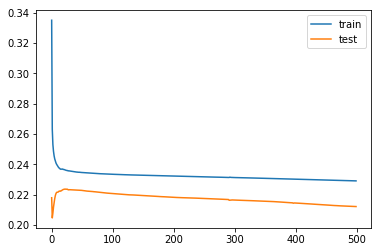

In [58]:
# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=32, kernel_size=10, activation='relu',input_shape=(n_steps_in, n_features))))
model.add(TimeDistributed(MaxPooling1D(pool_size=3)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(120, activation='softmax', input_shape=(n_steps_in, n_features)))
model.add(Dense(160,activation='relu'))
model.add(Dense(n_output,activation='relu'))
model.compile(optimizer='adagrad', loss='mae')
history = model.fit(X_train,y_train,epochs=500,validation_data=(X_test, y_test),verbose=2,shuffle=False)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [59]:
yhat = model.predict(X_test)
n_yhat = yhat.reshape((y_test.shape[0]* n_steps_out,n_features))
inv_yhat = scaler.inverse_transform(n_yhat)
inv_yhat = inv_yhat[:,4:7]
y_test = y_test.reshape((y_test.shape[0]* n_steps_out,n_features))
inv_y = scaler.inverse_transform(y_test)
inv_y = inv_y[:,4:7]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 384.629


In [60]:
i=0
ninhat=[]
x_input = scaled[-12:,:]
x_input = x_input.reshape((1,1, n_steps_in, n_features))
nx_input = x_input
while i < 8:
    nyhat = model.predict(nx_input)
    #print(nyhat)
    nx_input = nx_input.reshape((n_steps_in, n_features))
    nyhat = nyhat.reshape((n_steps_out, n_features))
    nx_input = np.append(nx_input[3:,:],nyhat)
    nx_input = nx_input.reshape((1,1, n_steps_in, n_features))
    ninhat = np.append(ninhat,nyhat)
    i = i+1

In [61]:
dataset.head()

,Monthlyprod.Thp,Monthlyprod.Bean,Monthlyprod.Days,Daily Gas prod. Mscfd,GOR STB/SCF,WCUT Fraction,Daily Prod. Oil,Water daily
Date,,,,,,,,
01/10/91,1012.0,16,26.0,97.269231,502.084574,0.0,193.730769,0.0
01/11/91,1027.0,16,29.5,163.762712,1075.706969,0.0,152.237288,0.0
01/12/91,1050.0,20,30.7,190.977199,258.863526,0.0,737.752443,0.0
01/01/92,950.0,20,31.0,241.193548,233.291732,0.0,1033.870968,0.0
01/02/92,900.0,28,27.1,263.284133,234.218560,0.0,1124.095941,0.0


In [62]:
print(nx_input.shape)
print(nyhat.shape)
print(ninhat.shape)

(1, 1, 12, 8)
(3, 8)
(192,)


In [63]:
ninhat = ninhat.reshape((24, n_features))
ninhat = scaler.inverse_transform(ninhat)
print(ninhat.shape)

(24, 8)


In [64]:
print(ninhat[:,4:7])

[[ 196.01031882    0.          642.79348271]
 [   0.            0.          643.47394557]
 [ 188.70373732    0.            0.        ]
 [ 224.32552529    0.          761.60733079]
 [   0.            0.          766.71610105]
 [ 218.9048828     0.            0.        ]
 [ 242.97753832    0.          839.55626041]
 [   0.            0.          847.35089395]
 [ 238.91413962    0.            0.        ]
 [ 257.81625508    0.          904.95106989]
 [   0.            0.          915.87678193]
 [ 255.38419985    0.            0.        ]
 [ 270.02971319    0.          958.9843355 ]
 [   0.            0.          973.29392617]
 [ 268.9536151     0.            0.        ]
 [ 276.36012729    0.          988.91288898]
 [   0.            0.         1005.88195898]
 [ 276.58345492    0.            0.        ]
 [ 279.13570064    0.         1003.09210544]
 [   0.            0.         1021.03053694]
 [ 279.9814251     0.            0.        ]
 [ 279.4487882     0.         1005.81141781]
 [   0.   

In [65]:
#print(nx_input[0,2] ,nx_input[0,5])

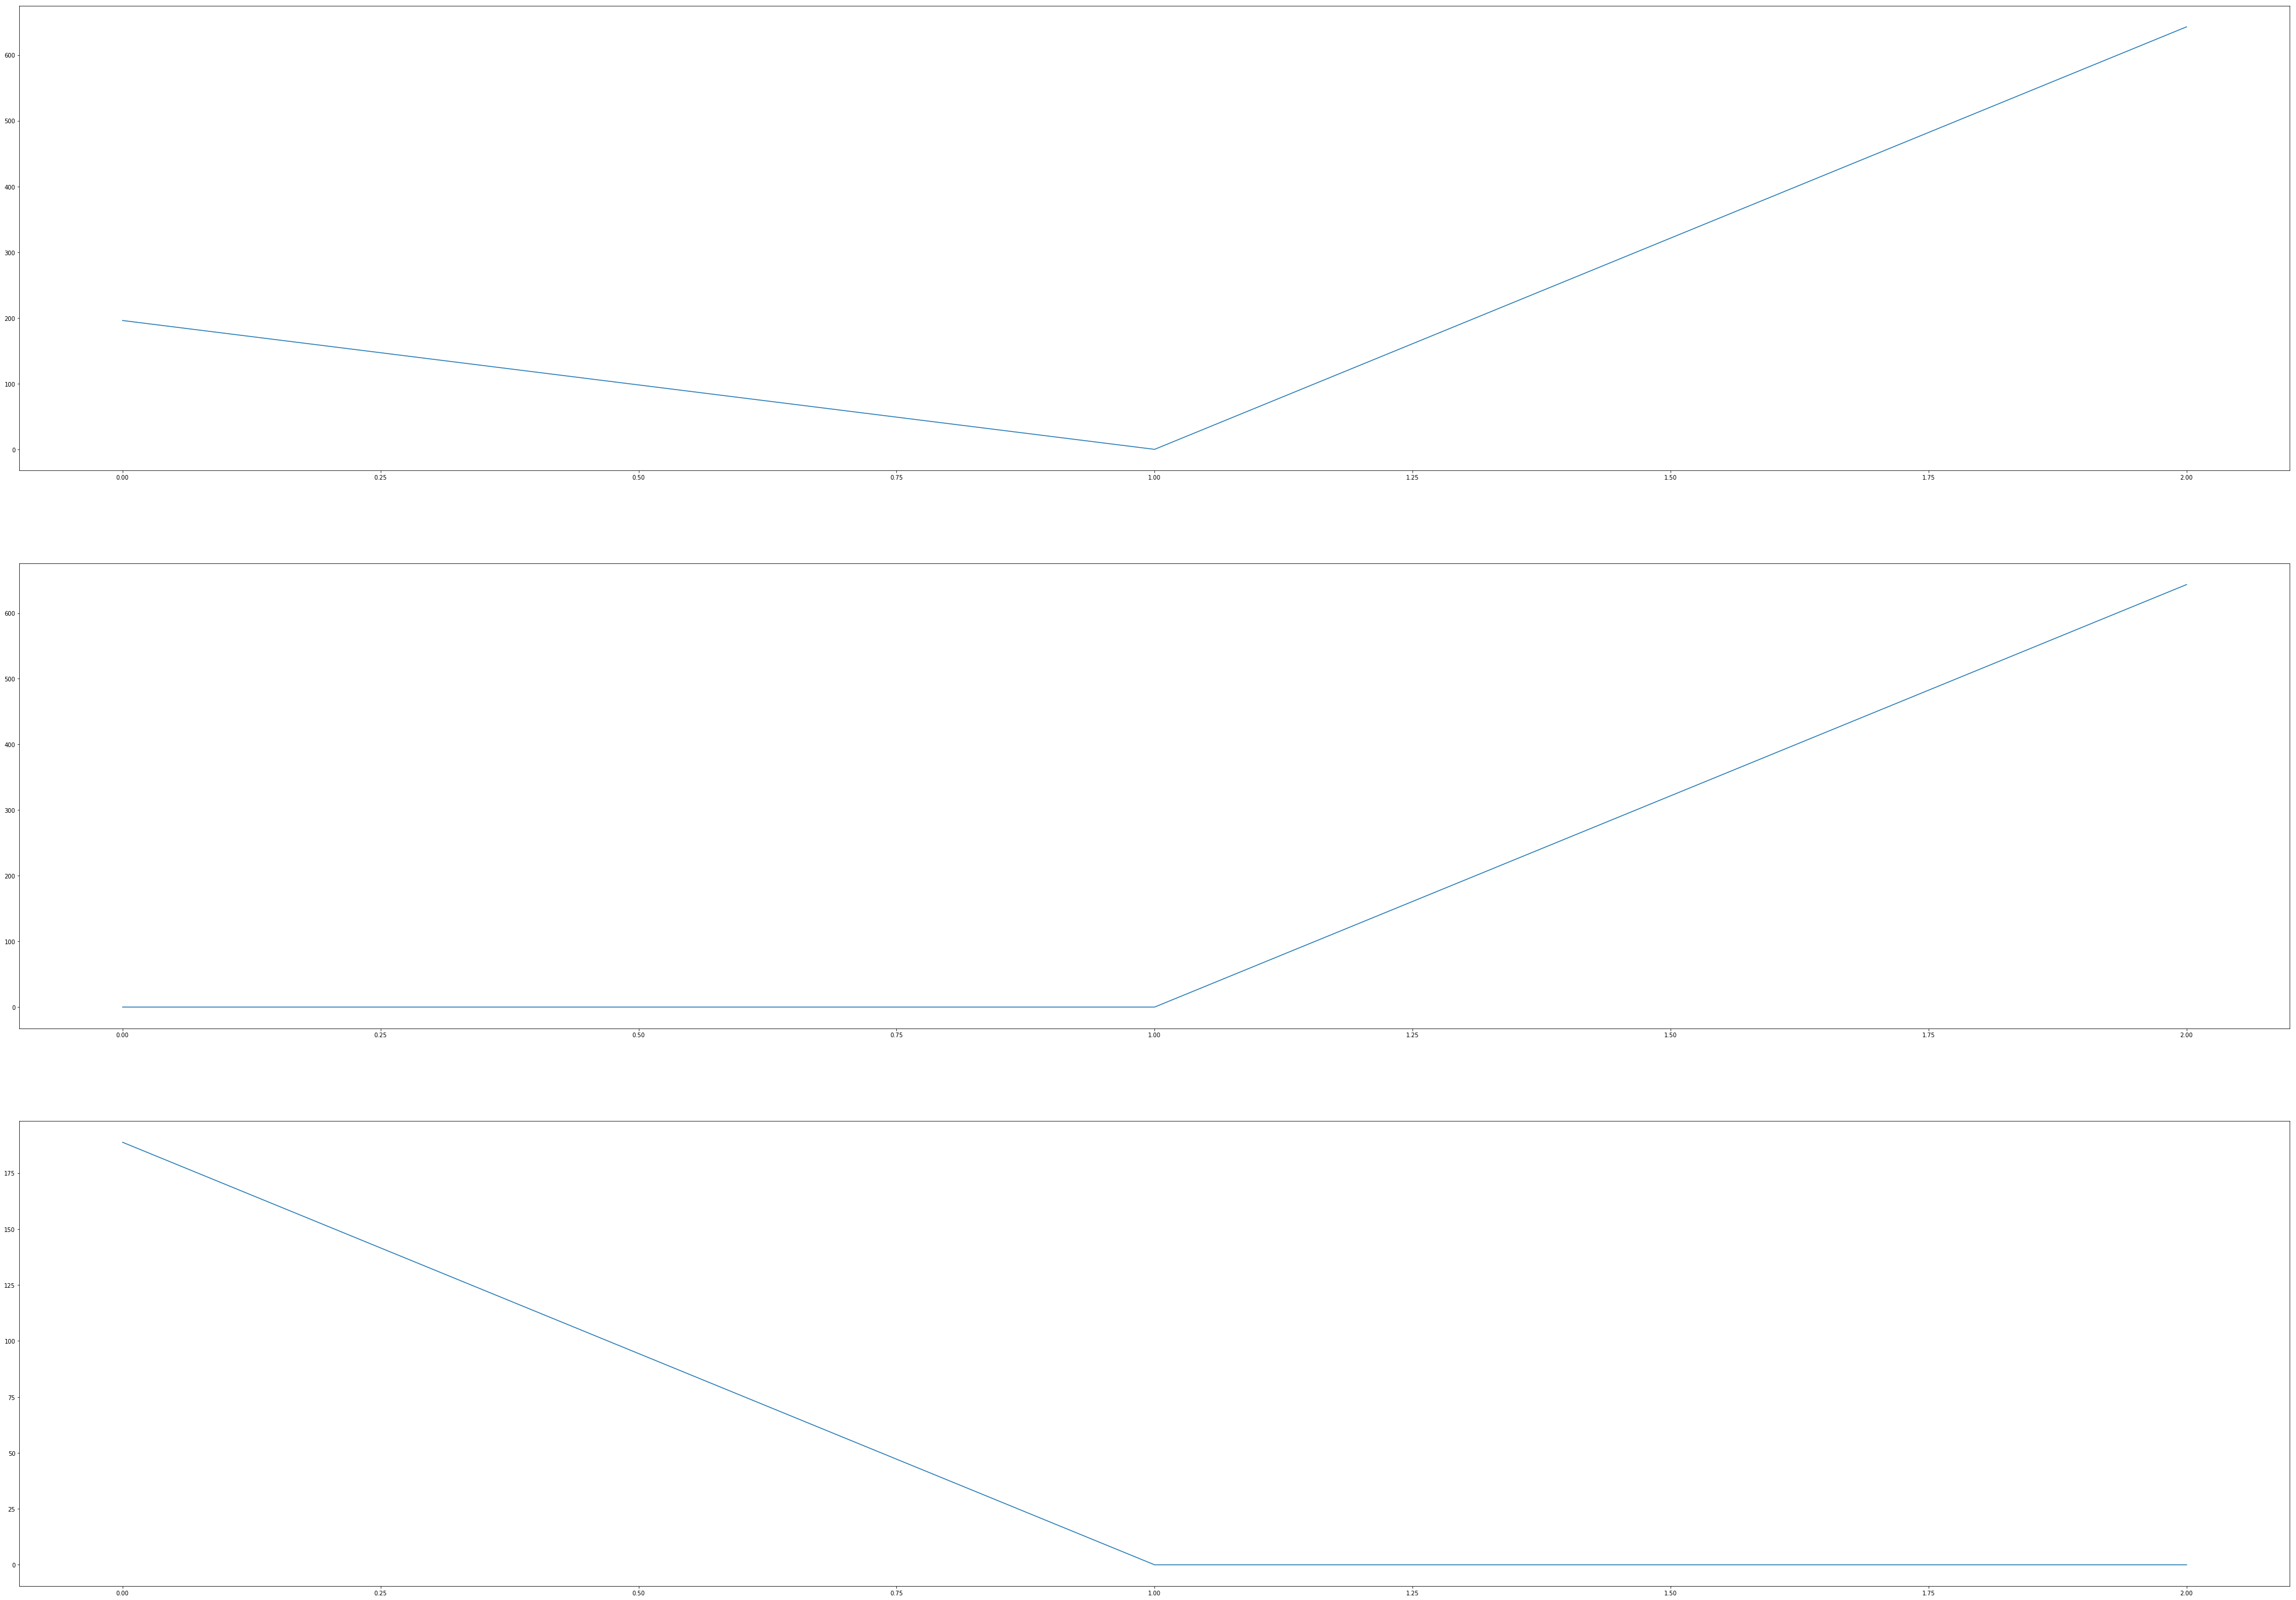

In [66]:
groups = [0,1,2]
i = 1
# plot each column
plt.figure(figsize=(70,50))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(ninhat[group, 4:7])
	#plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [67]:
new = dataset

In [68]:
new.shape

(275, 8)

In [69]:
new.columns

Index(['Monthlyprod.Thp', 'Monthlyprod.Bean', 'Monthlyprod.Days',
       'Daily Gas prod. Mscfd', 'GOR STB/SCF', 'WCUT Fraction',
       'Daily Prod. Oil', 'Water daily '],
      dtype='object')

In [70]:
new.index

Index(['01/10/91', '01/11/91', '01/12/91', '01/01/92', '01/02/92', '01/03/92',
       '01/04/92', '01/05/92', '01/06/92', '01/07/92',
       ...
       '01/03/14', '01/04/14', '01/05/14', '01/06/14', '01/07/14', '01/08/14',
       '01/09/14', '01/10/14', '01/11/14', '01/12/14'],
      dtype='object', name='Date', length=275)

In [71]:
nin=new.index[-1]
print(nin)

01/12/14


In [72]:
newxhat= pd.DataFrame(ninhat,columns=[c for c in new.columns] )

In [73]:
newxhat.shape

(24, 8)

In [74]:
new=new.append(newxhat)
new.shape

(299, 8)

In [75]:
new.head(4)

,Monthlyprod.Thp,Monthlyprod.Bean,Monthlyprod.Days,Daily Gas prod. Mscfd,GOR STB/SCF,WCUT Fraction,Daily Prod. Oil,Water daily
01/10/91,1012.0,16.0,26.0,97.269231,502.084574,0.0,193.730769,0.0
01/11/91,1027.0,16.0,29.5,163.762712,1075.706969,0.0,152.237288,0.0
01/12/91,1050.0,20.0,30.7,190.977199,258.863526,0.0,737.752443,0.0
01/01/92,950.0,20.0,31.0,241.193548,233.291732,0.0,1033.870968,0.0


In [78]:
newbori = new.to_csv('newbori4b.csv')